# Example `Dysmalpy` 1D fitting, using fitting wrapper

**Includes the following components:**

 - Disk + Bulge
 - NFW halo
 - Constant velocity dispersion

## Setup steps ##

**First import modules**

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from dysmalpy import fitting
from dysmalpy.fitting_wrappers import dysmalpy_fit_single, utils_io

import os

import numpy as np


**Setup notebook**

In [2]:
# Setup plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)

from IPython.core.display import Image


**Set data, output paths**

In [3]:
# Data directory
datadir = '/Users/sedona/data/dysmalpy_example_data/'
#'/YOUR/DATA/PATH/'

# Where to save output files
outdir = '/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_1D_FITTING_WRAPPER/'
outdir_mpfit = outdir + 'MPFIT/'

param_filename = '/Users/sedona/data/dysmalpy_test_examples/fitting_1D_mpfit.params'

-------------------

**Settings in parameter file:**

In [4]:
with open(param_filename, 'r') as f:
    print(f.read())

# Example parameters file for fitting a single object with 1D data
# Note: DO NOT CHANGE THE NAMES IN THE 1ST COLUMN AND KEEP THE COMMAS!!
# See README for a description of each parameter and its available options.

# ******************************* OBJECT INFO **********************************
galID,    GS4_43501    # Name of your object
z,        1.613        # Redshift


# ****************************** DATA INFO *************************************

#datadir,          None                       # Optional: Full path to data directory. 
datadir,   /Users/sedona/Dropbox/RCOut_Reinhard/rc_2019_analysis/1D_profiles/

fdata,            GS4_43501.obs_prof.txt     # Full path to your data. Alternatively, just the filename if 'datadir' is set.
data_inst_corr,   True                       # Is the dispersion corrected for
                                             # instrumental broadening?
slit_width,       0.55                       # arcsecs
slit_pa,          142.                    

**Add some settings for this notebook example:**

In [5]:
plot_type = 'png'

--------

## Run `Dysmalpy` fitting: 1D wrapper, with fit method= MPFIT ##

In [6]:
dysmalpy_fit_single.dysmalpy_fit_single(param_filename=param_filename, 
                                        datadir=datadir, outdir=outdir_mpfit, 
                                        plot_type=plot_type)

INFO:DysmalPy:*************************************
INFO:DysmalPy: Fitting: GS4_43501 using MPFIT
INFO:DysmalPy:    obs: OBS
INFO:DysmalPy:        velocity file: /Users/sedona/data/dysmalpy_example_data/GS4_43501.obs_prof.txt
INFO:DysmalPy:        nSubpixels: 3
INFO:DysmalPy:
mvirial_tied: <function tie_lmvirial_NFW at 0x1302dae60>
INFO:DysmalPy:
MPFIT Fitting:
Start: 2022-05-28 22:18:58.525528

INFO:DysmalPy:Iter 1  CHI-SQUARE = 1321.194768  DOF = 31
   disk+bulge:total_mass = 11  
   disk+bulge:r_eff_disk = 5  
   disk+bulge:bt = 0.3  
   halo:fdm = 0.5  
   dispprof_LINE:sigma0 = 39  

INFO:DysmalPy:Iter 2  CHI-SQUARE = 427.2717254  DOF = 31
   disk+bulge:total_mass = 11.18474723  
   disk+bulge:r_eff_disk = 5.090017688  
   disk+bulge:bt = 0  
   halo:fdm = 0.2578196858  
   dispprof_LINE:sigma0 = 42.78893367  

INFO:DysmalPy:Iter 3  CHI-SQUARE = 81.36393257  DOF = 31
   disk+bulge:total_mass = 10.87077646  
   disk+bulge:r_eff_disk = 2.818755439  
   disk+bulge:bt = 0  
   halo:fd

------------------------------------------------------------------
 Dysmalpy MPFIT fitting complete for: GS4_43501
   output folder: /Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_1D_FITTING_WRAPPER/MPFIT/
------------------------------------------------------------------
 


## Examine results ##

### Result plots ###

**Read in parameter file**

In [7]:
params = utils_io.read_fitting_params(fname=param_filename)

# Override data + output paths:
params['datadir'] = datadir
params['outdir'] = outdir_mpfit

# Add the plot type:
params['plot_type'] = plot_type


f_galmodel = params['outdir'] + '{}_model.pickle'.format(params['galID'])
f_results =  params['outdir'] + '{}_{}_results.pickle'.format(params['galID'], 
                                                        params['fit_method'])


**Best-fit plot**

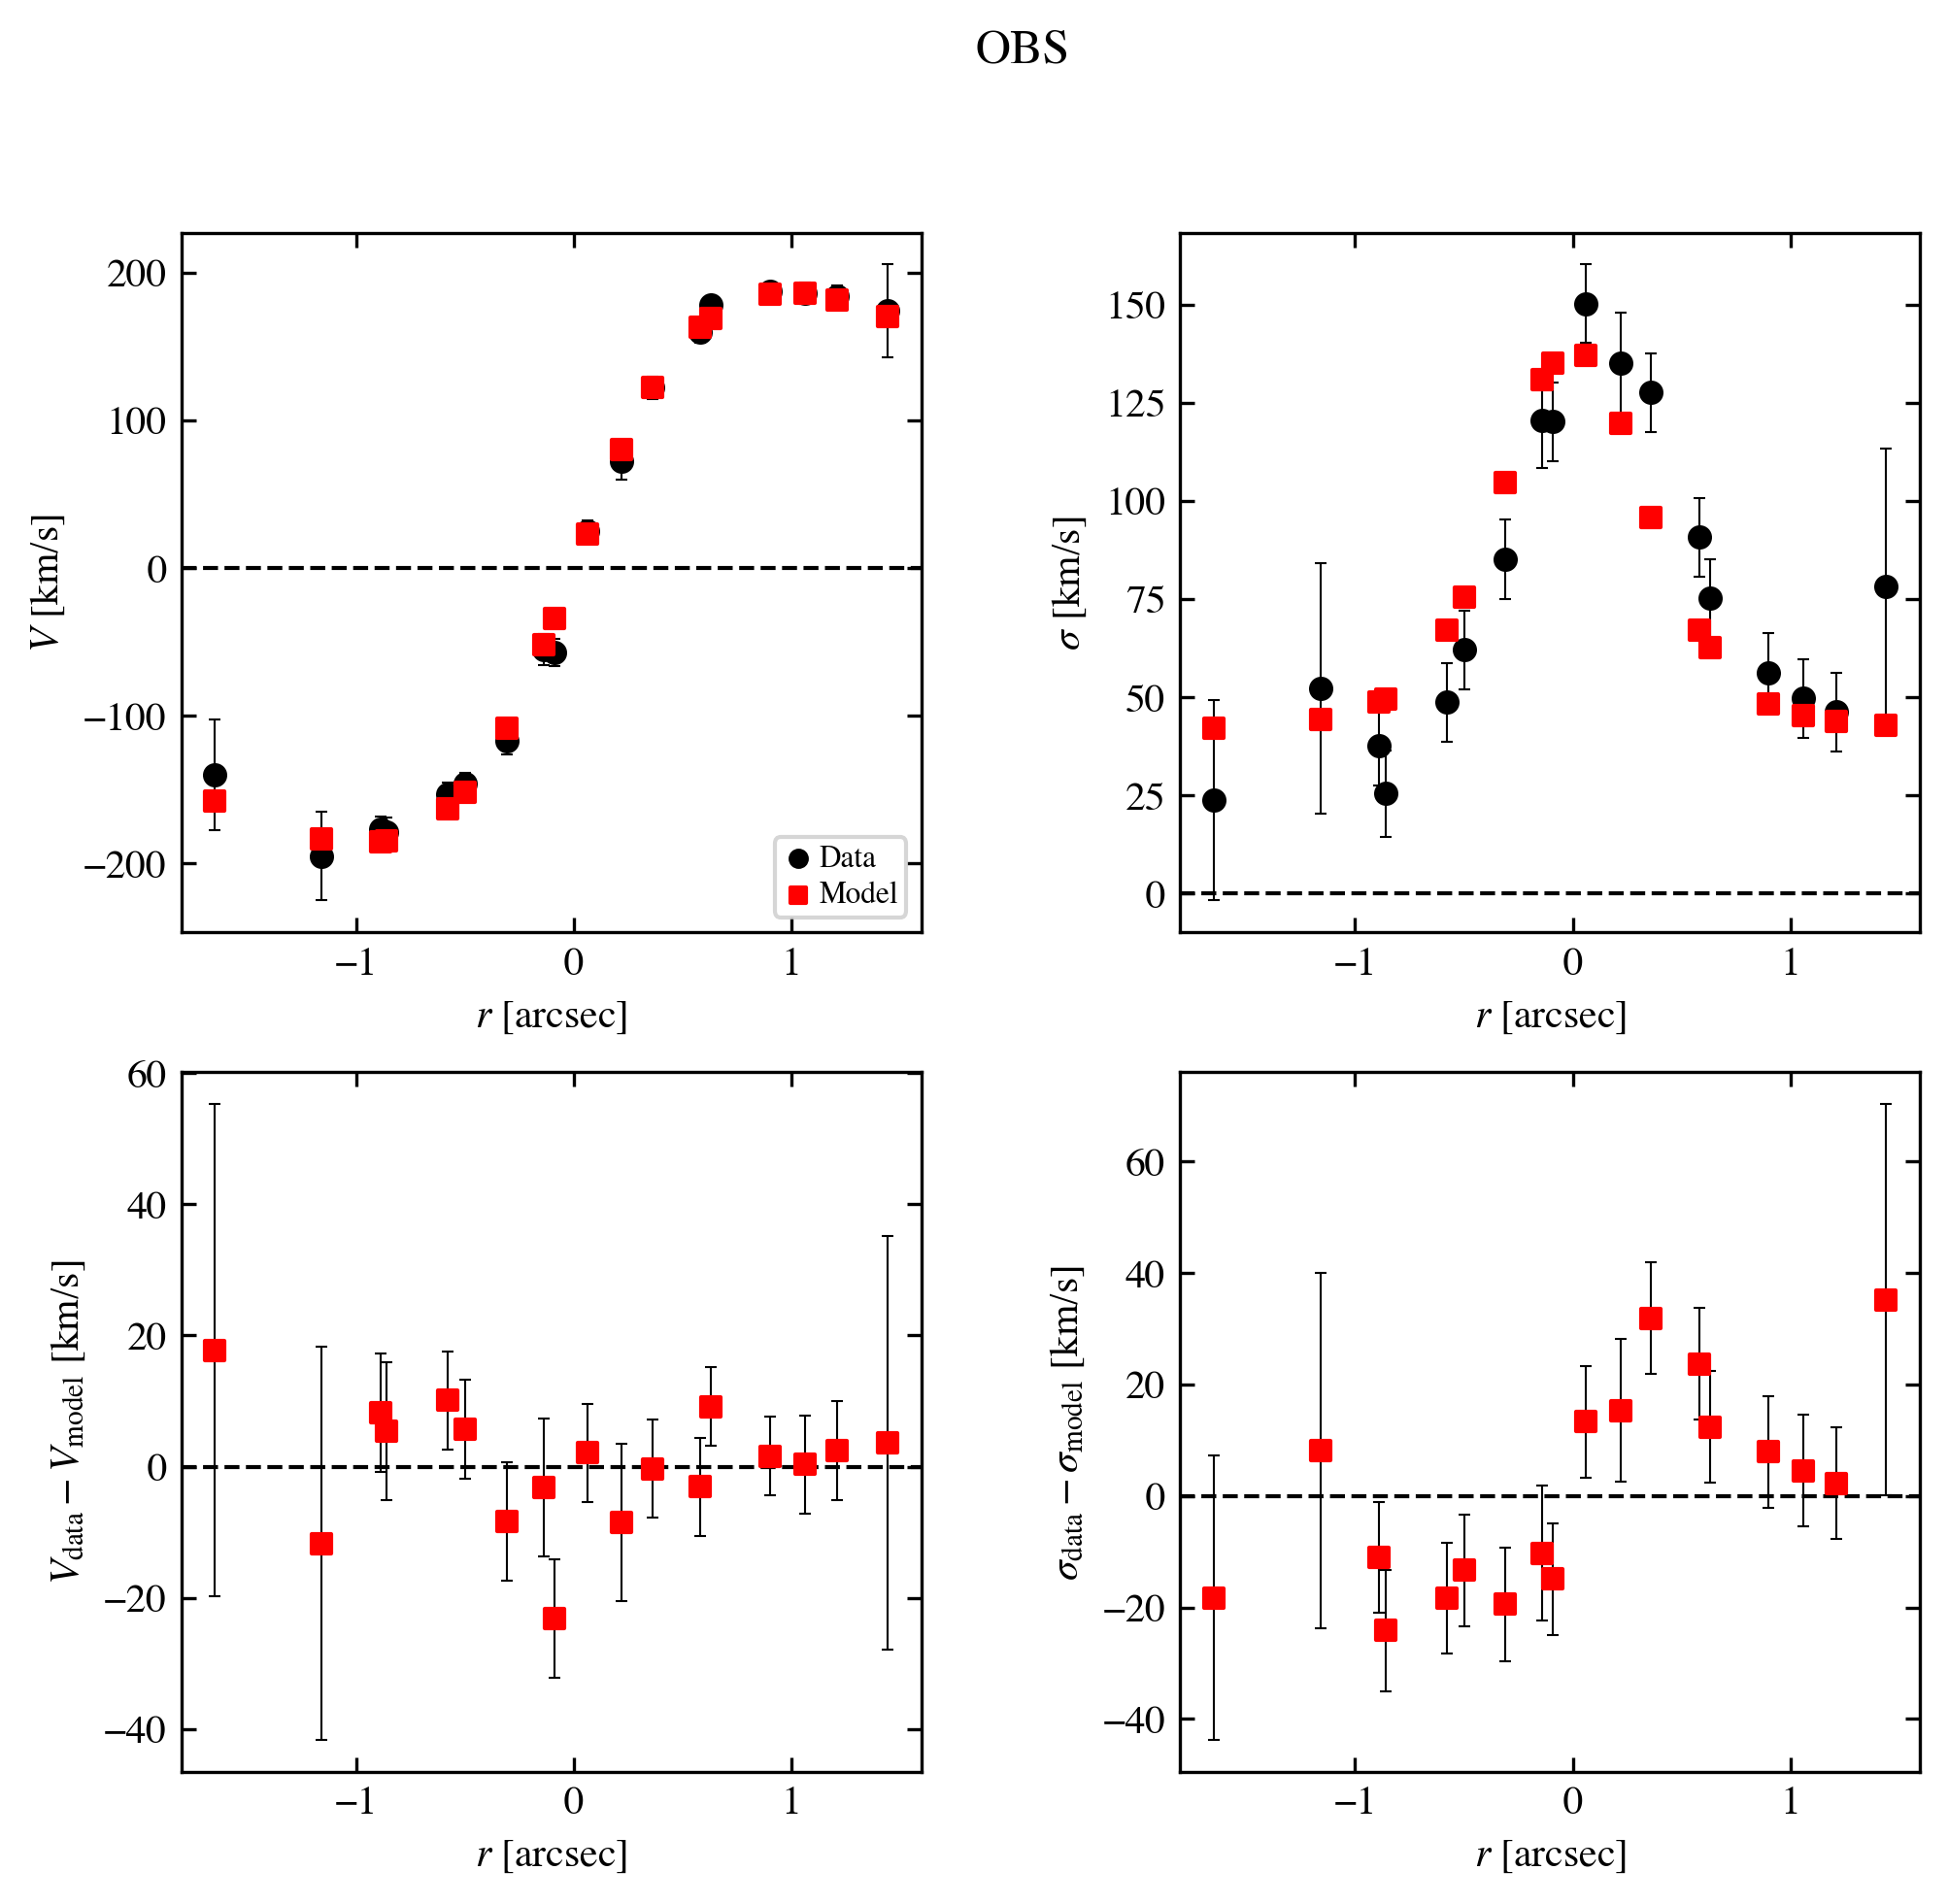

In [8]:
# Look at best-fit saved plot:
filepath = outdir_mpfit+"{}_{}_bestfit_{}.{}".format(params['galID'], 
                                                      params['fit_method'], 
                                                      params['obs_1_name'], 
                                                      params['plot_type'])
Image(filename=filepath, width=600)

#### <font size="4">Directly generating result plots</font> ####

**Reload the galaxy, results files:**

In [9]:
gal, results = fitting.reload_all_fitting(filename_galmodel=f_galmodel, 
                                          filename_results=f_results, 
                                          fit_method=params['fit_method'])


**Plot the best-fit results:**

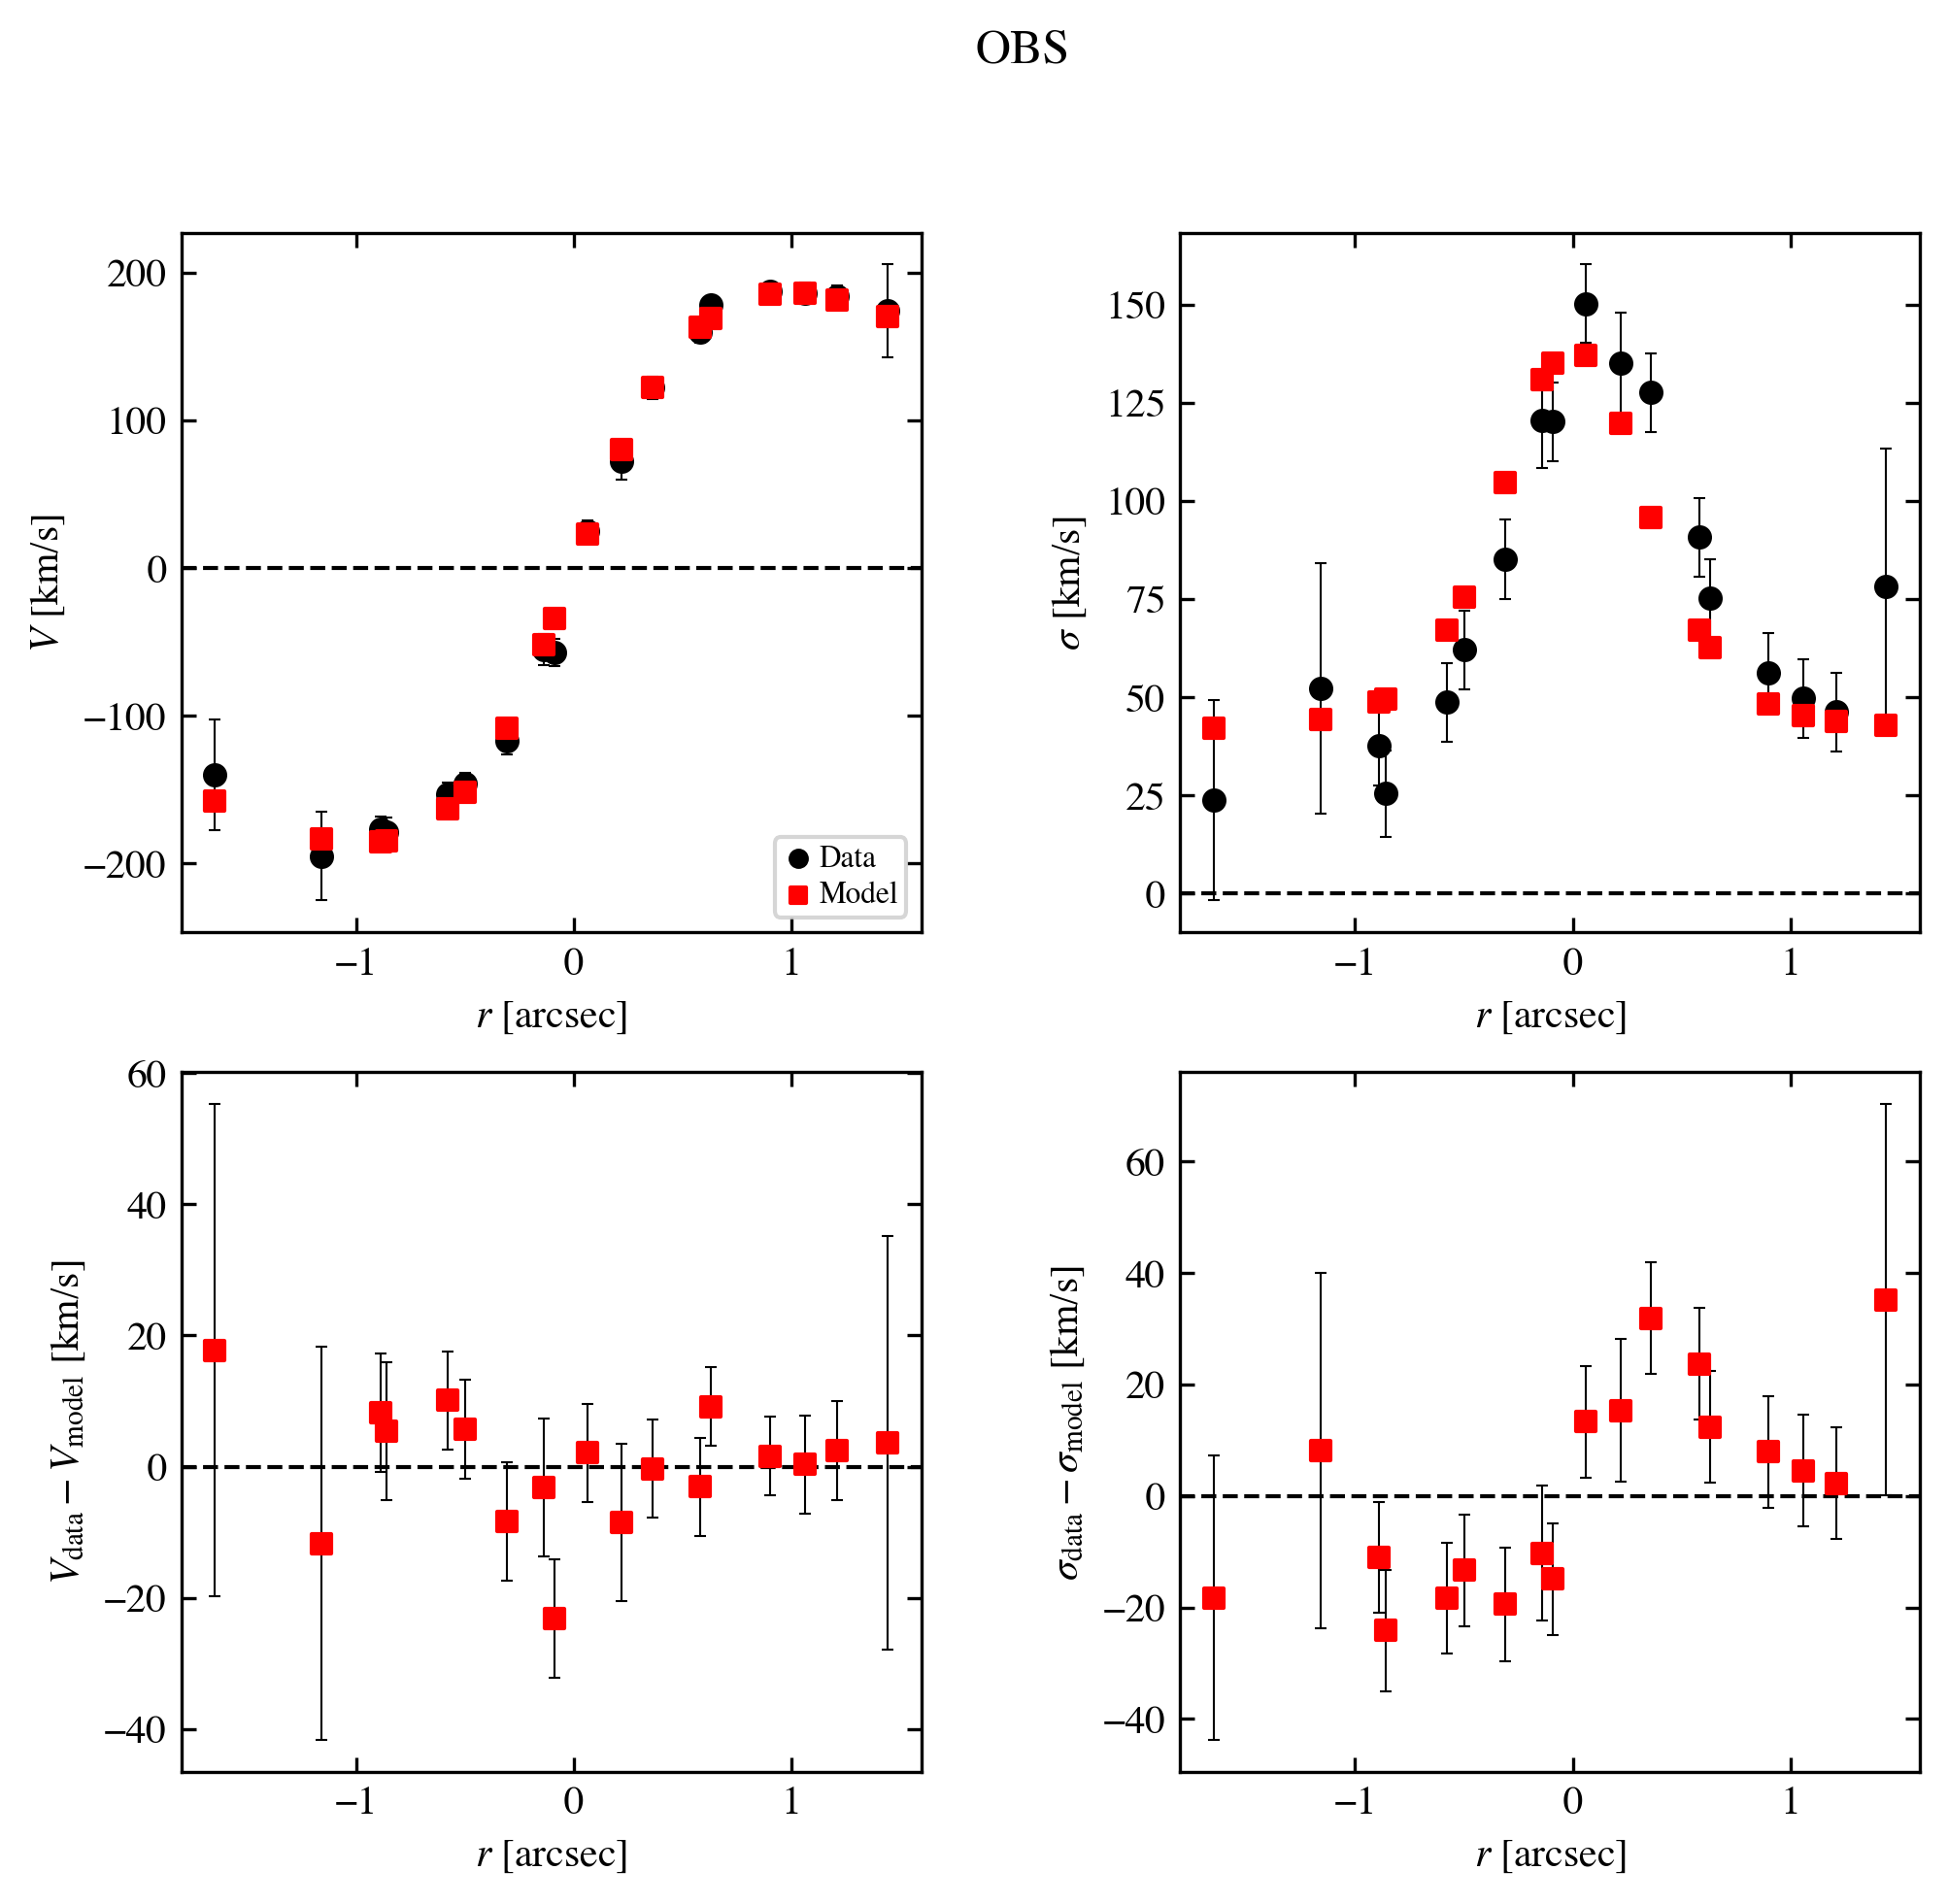

In [10]:
results.plot_results(gal)

### Results reports ###

We now look at the results reports, which include the best-fit values and uncertainties (as well as other fitting settings and output).

In [11]:
# Print report
print(results.results_report(gal=gal))

###############################
 Fitting for GS4_43501

Date: 2022-05-28 22:24:01.760605

    obs: OBS
         Datafiles:
             vel :  /Users/sedona/data/dysmalpy_example_data/GS4_43501.obs_prof.txt
         apertures:        CircApertures
         fit_velocity:           True
         fit_dispersion:         True
         fit_flux:               False
         moment:           False
         partial_weight:        True
         n_wholepix_z_min:      3
         oversample:            3
         oversize:              1


Fitting method: MPFIT
    fit status: 1

pressure_support:      True
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass         10.9167  +/-   0.1210
    r_eff_disk          3.3991  +/-   0.6307
    bt                  0.0115  +/-   0.0423

    n_disk              1.0000  [FIXED]
    r_eff_bulge         1.0000  [FIXED]
    n_bulge             4.0000  [FIXED]
    mass_to_light       1.0000  [FIXED]

**To <span style="color:DarkCyan">directly save</span> the results report** to a file, we can use the following:

In [12]:
# Save report to file:
f_report = params['outdir'] + '{}_fit_report.txt'.format(params['galID'])
results.results_report(gal=gal, filename=f_report)

**Also note the fitting wrappers automatically save two versions of the report files:**

In [13]:
fbase = '{}_{}_bestfit_results'.format(params['galID'], params['fit_method'])
f_report_pretty =  params['outdir'] + fbase + '_report.info'
f_report_machine = params['outdir'] + fbase + '.dat'

The "pretty" version, automatically saved as `*_best_fit_results_report.info`, is formatted to be human-readable, and includes more information on the fit settings at the beginning (for reference).

In [14]:
with open(f_report_pretty, 'r') as f:
    lines = [line.rstrip() for line in f]
    for line in lines: print(line)

###############################
 Fitting for GS4_43501

Date: 2022-05-28 22:23:42.546234

    obs: OBS
         Datafiles:
             vel :  /Users/sedona/data/dysmalpy_example_data/GS4_43501.obs_prof.txt
         apertures:        CircApertures
         fit_velocity:           True
         fit_dispersion:         True
         fit_flux:               False
         moment:           False
         partial_weight:        True
         n_wholepix_z_min:      3
         oversample:            3
         oversize:              1


Fitting method: MPFIT
    fit status: 1

pressure_support:      True
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass         10.9167  +/-   0.1210
    r_eff_disk          3.3991  +/-   0.6307
    bt                  0.0115  +/-   0.0423

    n_disk              1.0000  [FIXED]
    r_eff_bulge         1.0000  [FIXED]
    n_bulge             4.0000  [FIXED]
    mass_to_light       1.0000  [FIXED]

The "machine" version, automatically saved as `*_best_fit_results.dat`, is formatted as a machine-readable space-separated ascii file. It includes key parameter fit information, as well as the best-fit reduced chisq.

In [15]:
with open(f_report_machine, 'r') as f:
    lines = [line.rstrip() for line in f]
    for line in lines: print(line)

# component             param_name      fixed       best_value   l68_err     u68_err
disk+bulge              total_mass      False        10.9167      0.1210      0.1210
disk+bulge              r_eff_disk      False         3.3991      0.6307      0.6307
disk+bulge              n_disk          True          1.0000    -99.0000    -99.0000
disk+bulge              r_eff_bulge     True          1.0000    -99.0000    -99.0000
disk+bulge              n_bulge         True          4.0000    -99.0000    -99.0000
disk+bulge              bt              False         0.0115      0.0423      0.0423
disk+bulge              mass_to_light   True          1.0000    -99.0000    -99.0000
halo                    mvirial         TIED         11.5246    -99.0000    -99.0000
halo                    fdm             False         0.1245      0.0833      0.0833
halo                    conc            True          5.0000    -99.0000    -99.0000
dispprof_LINE           sigma0          False        35.8823    -